In [97]:
import polars as pl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [98]:
df = pl.scan_csv('goodreads_dataset/Good_Reads_Book_Awards_Crawl_2023_12_27_11_14.csv')
pd_df = pd.read_csv('goodreads_dataset/Good_Reads_Book_Awards_Crawl_2023_12_27_11_14.csv')

In [99]:
df.collect().sample(5)

source_URL,Readers Choice Votes,Readers Choice Category,Title,Author,Total Avg Rating,Number of Ratings,Number of Reviews,Number of Pages,Edition,Book Description,First Published date,Kindle Version and Price,Kindle Price,About the Author
str,i64,str,str,str,f64,str,str,i64,str,str,str,str,f64,str
"""https://www.goodreads.com/book…",2616,"""Nonfiction""","""The Good Life: Lessons from th…","""Robert Waldinger|Marc Schulz""",4.17,"""5,471""","""640""",352,"""Hardcover""","""Alternate cover edition of ISB…","""10-Jan-23""","""Kindle $14.99""",14.99,"""Robert J. Waldinger (born 1951…"
"""https://www.goodreads.com/book…",31428,"""Mystery & Thriller""","""All the Dangerous Things""","""Stacy Willingham""",4.09,"""135,776""","""14,908""",326,"""Hardcover""","""One year ago, Isabelle Drake's…","""10-Jan-23""","""Kindle $14.99""",14.99,"""Stacy Willingham is the New Yo…"
"""https://www.goodreads.com/book…",1930,"""History & Biography""","""There Will Be Fire: Margaret T…","""Rory Carroll""",4.41,"""2,619""","""289""",397,"""Hardcover""","""Say Nothing meets The Day of t…","""4-Apr-23""","""Kindle $14.99""",14.99,"""Rory Carroll (b. 1972) is a jo…"
"""https://www.goodreads.com/book…",28274,"""Fantasy""","""The Adventures of Amina al-Sir…","""Shannon Chakraborty""",4.31,"""29,593""","""6,174""",483,"""Hardcover""","""Shannon Chakraborty, the bests…","""28-Feb-23""","""Kindle $14.99""",14.99,"""also writes as S.A. Chakrabort…"
"""https://www.goodreads.com/book…",18122,"""Nonfiction""","""8 Rules of Love: How to Find I…","""Jay Shetty""",3.98,"""13,367""","""1,054""",309,"""Hardcover""","""The author of the #1 New York …","""31-Jan-23""","""Kindle $14.99""",14.99,"""Jay Shetty is a storyteller, p…"


In [100]:
# pd_df.info()

print(df.schema)
# pd_df.drop(['source_URL', 'Book Description', 'About the Author'], axis=1, inplace=True)
df = df.drop(['source_URL', 'Book Description', 'About the Author'])

Schema([('source_URL', String), ('Readers Choice Votes', Int64), ('Readers Choice Category', String), ('Title', String), ('Author', String), ('Total Avg Rating', Float64), ('Number of Ratings', String), ('Number of Reviews', String), ('Number of Pages', Int64), ('Edition', String), ('Book Description', String), ('First Published date', String), ('Kindle Version and Price', String), ('Kindle Price', Float64), ('About the Author', String)])


In [101]:
numeric_columns = ['Number of Ratings','Number of Reviews']

#for column in numeric_columns:
    # pd_df[column] = pd_df[column].str.replace(',', '', regex=True).astype('int32')

# Remove the character comma from those columns and convert to Int32
new_cols = [
    pl.col(column).str.replace(',', '').cast(pl.Int32).alias(column)
    for column in numeric_columns]
df = df.with_columns(new_cols)

df.collect() # we indicate a collect to see the changes




Readers Choice Votes,Readers Choice Category,Title,Author,Total Avg Rating,Number of Ratings,Number of Reviews,Number of Pages,Edition,First Published date,Kindle Version and Price,Kindle Price
i64,str,str,str,f64,i32,i32,i64,str,str,str,f64
200722,"""Fiction""","""Yellowface""","""R.F. Kuang""",3.87,252189,37032,336,"""Hardcover""","""25-May-23""","""Kindle $14.99""",14.99
60171,"""Fiction""","""Hello Beautiful""","""Ann Napolitano""",4.2,200304,19288,416,"""Kindle Edition""","""14-Mar-23""","""Kindle $2.99""",2.99
57702,"""Fiction""","""The Wishing Game""","""Meg Shaffer""",4.19,62142,10594,304,"""Hardcover""","""30-May-23""","""Kindle $2.99""",2.99
53470,"""Fiction""","""Tom Lake""","""Ann Patchett""",4.13,127318,16108,309,"""Hardcover""","""1-Aug-23""","""Kindle $15.99""",15.99
45859,"""Fiction""","""The Five-Star Weekend""","""Elin Hilderbrand""",4.11,116619,8141,384,"""Hardcover""","""13-Jun-23""","""Kindle $14.99""",14.99
…,…,…,…,…,…,…,…,…,…,…,…
2533,"""Humor""","""Misfit: Growing Up Awkward in …","""Gary Gulman""",4.23,981,155,304,"""Hardcover""","""19-Sep-23""","""Kindle $14.99""",14.99
2257,"""Humor""","""Unreliable Narrator: Me, Mysel…","""Aparna Nancherla""",3.71,517,71,304,"""Hardcover""","""19-Sep-23""","""Kindle $14.99""",14.99
1866,"""Humor""","""America the Beautiful?: One Wo…","""Blythe Roberson""",3.83,1200,247,304,"""Paperback""","""18-Apr-23""","""Kindle $9.99""",9.99


In [102]:
# pd_df['Kindle Version'] = df['Kindle Version and Price'].str.extract('([a-zA-Z ]+)', expand=False).str.strip()
# pd_df['Kindle Version'] = df['Kindle Version'].astype('category')

df = df.with_columns(pl.col('Kindle Version and Price')
    .str.extract('([a-zA-Z ]+)')
    .str.strip_chars()
    .cast(pl.Categorical)
    .alias('Kindle Version'))
df = df.collect()  # we indicate a collect to see the changes

In [103]:
df.describe()

statistic,Readers Choice Votes,Readers Choice Category,Title,Author,Total Avg Rating,Number of Ratings,Number of Reviews,Number of Pages,Edition,First Published date,Kindle Version and Price,Kindle Price,Kindle Version
str,f64,str,str,str,f64,f64,f64,f64,str,str,str,f64,str
"""count""",299.0,"""299""","""299""","""299""",299.0,299.0,299.0,299.0,"""299""","""299""","""299""",299.0,"""299"""
"""null_count""",0.0,"""0""","""0""","""0""",0.0,0.0,0.0,0.0,"""0""","""0""","""0""",0.0,"""0"""
"""mean""",19662.919732,null,null,null,4.063512,38748.351171,5241.705686,392.394649,null,null,null,11.327926,null
"""std""",32406.337679,null,null,null,0.252188,79586.655592,10800.06966,123.698044,null,null,null,5.351909,null
"""min""",935.0,"""Debut Novel""","""8 Rules of Love: How to Find I…","""Abby Jimenez""",3.52,228.0,71.0,192.0,"""Hardcover""","""1-Aug-23""","""Kindle $1.99""",0.0,null
"""25%""",3593.0,null,null,null,3.86,5553.0,959.0,320.0,null,null,null,9.99,null
"""50%""",10099.0,null,null,null,4.06,14519.0,2469.0,368.0,null,null,null,13.99,null
"""75%""",24792.0,null,null,null,4.25,37341.0,5112.0,432.0,null,null,null,14.99,null
"""max""",397565.0,"""Young Adult Fiction""","""Yours Truly""","""Ziwe""",4.75,930928.0,141668.0,1242.0,"""ebook""","""9-May-23""","""Kindle Unlimited $0.00""",17.99,null


In [104]:
# Find the number of missing values for each column
# pd_df.isnull().sum()
df.null_count()

Readers Choice Votes,Readers Choice Category,Title,Author,Total Avg Rating,Number of Ratings,Number of Reviews,Number of Pages,Edition,First Published date,Kindle Version and Price,Kindle Price,Kindle Version
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,0,0,0,0,0,0


In [105]:
cat_counts = df['Readers Choice Category'].value_counts(sort=True)
print(cat_counts)
# df.select(pl.col('Readers Choice Category').value_counts())

shape: (15, 2)
┌─────────────────────────┬───────┐
│ Readers Choice Category ┆ count │
│ ---                     ┆ ---   │
│ str                     ┆ u32   │
╞═════════════════════════╪═══════╡
│ Fiction                 ┆ 20    │
│ Historical Fiction      ┆ 20    │
│ Mystery & Thriller      ┆ 20    │
│ Romance                 ┆ 20    │
│ Romantasy               ┆ 20    │
│ …                       ┆ …     │
│ Nonfiction              ┆ 20    │
│ Memoir & Autobiography  ┆ 20    │
│ History & Biography     ┆ 20    │
│ Humor                   ┆ 20    │
│ Debut Novel             ┆ 19    │
└─────────────────────────┴───────┘


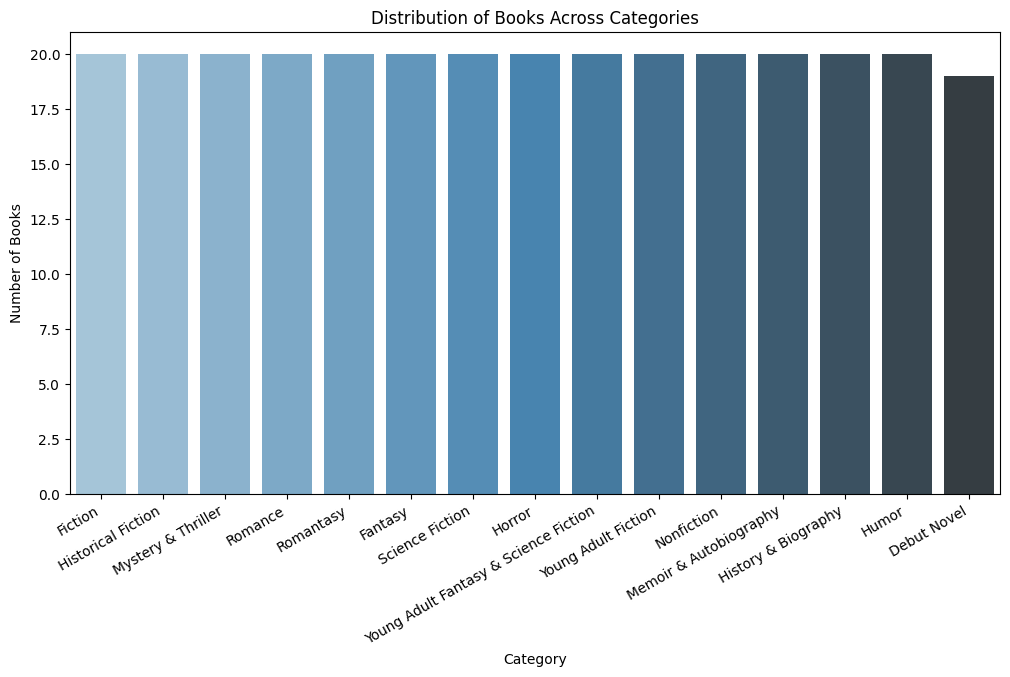

In [106]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Readers Choice Category', y='count', data=cat_counts, palette='Blues_d')
plt.title('Distribution of Books Across Categories')
plt.xlabel('Category')
plt.ylabel('Number of Books')
plt.xticks(rotation=30, ha='right')
plt.show()

In [107]:
# Determine which column we want to aggregate
# aggregations = {
#     'Readers Choice Votes': 'sum', 
#     'Total Avg Rating': 'mean',
#     'Number of Ratings': 'sum',
#     'Number of Reviews': 'sum',
#     'Number of Pages': 'median',
#     'Kindle Price': 'median',
# }

# category_vote_pd_df = pd_df.groupby('Readers Choice Category').agg(aggregations).sort_values('Readers Choice Votes', ascending=False)
# Create new DataFrame of Votes, Ratings, and Reviews
# result_df = pd.DataFrame({
#     'Avg Ratings': category_vote['Total Avg Rating'].round(2),
#     'Number of Ratings': category_vote['Number of Ratings'],
#     'Number of Reviews': category_vote['Number of Reviews'],
#     'Median Pages': category_vote['Number of Pages'],
#     'Median Kindle Price': category_vote['Kindle Price'].round(2)
# })


# Group by book category
result_df = df.group_by('Readers Choice Category')\
    .agg(
        pl.sum('Readers Choice Votes'),
        pl.mean('Total Avg Rating').round(2),
        pl.sum('Number of Ratings'),
        pl.sum('Number of Reviews'),
        pl.median('Number of Pages'),
        pl.median('Kindle Price').round(2)
    ).sort('Readers Choice Votes', descending=True)

result_df

Readers Choice Category,Readers Choice Votes,Total Avg Rating,Number of Ratings,Number of Reviews,Number of Pages,Kindle Price
str,i64,f64,i32,i32,f64,f64
"""Romance""",645601,4.06,2737676,336747,398.0,6.99
"""Fiction""",587718,3.95,1288841,157445,328.0,14.99
"""Romantasy""",572812,4.07,1387830,203928,506.0,5.49
"""Mystery & Thriller""",519745,4.05,1673792,181312,365.5,14.99
"""Fantasy""",456020,4.1,523942,93625,407.5,14.73
…,…,…,…,…,…,…
"""Horror""",295053,3.91,316925,59709,360.0,14.99
"""Debut Novel""",285135,4.08,566320,77107,344.0,12.99
"""Nonfiction""",224029,4.18,185864,21393,320.0,14.99


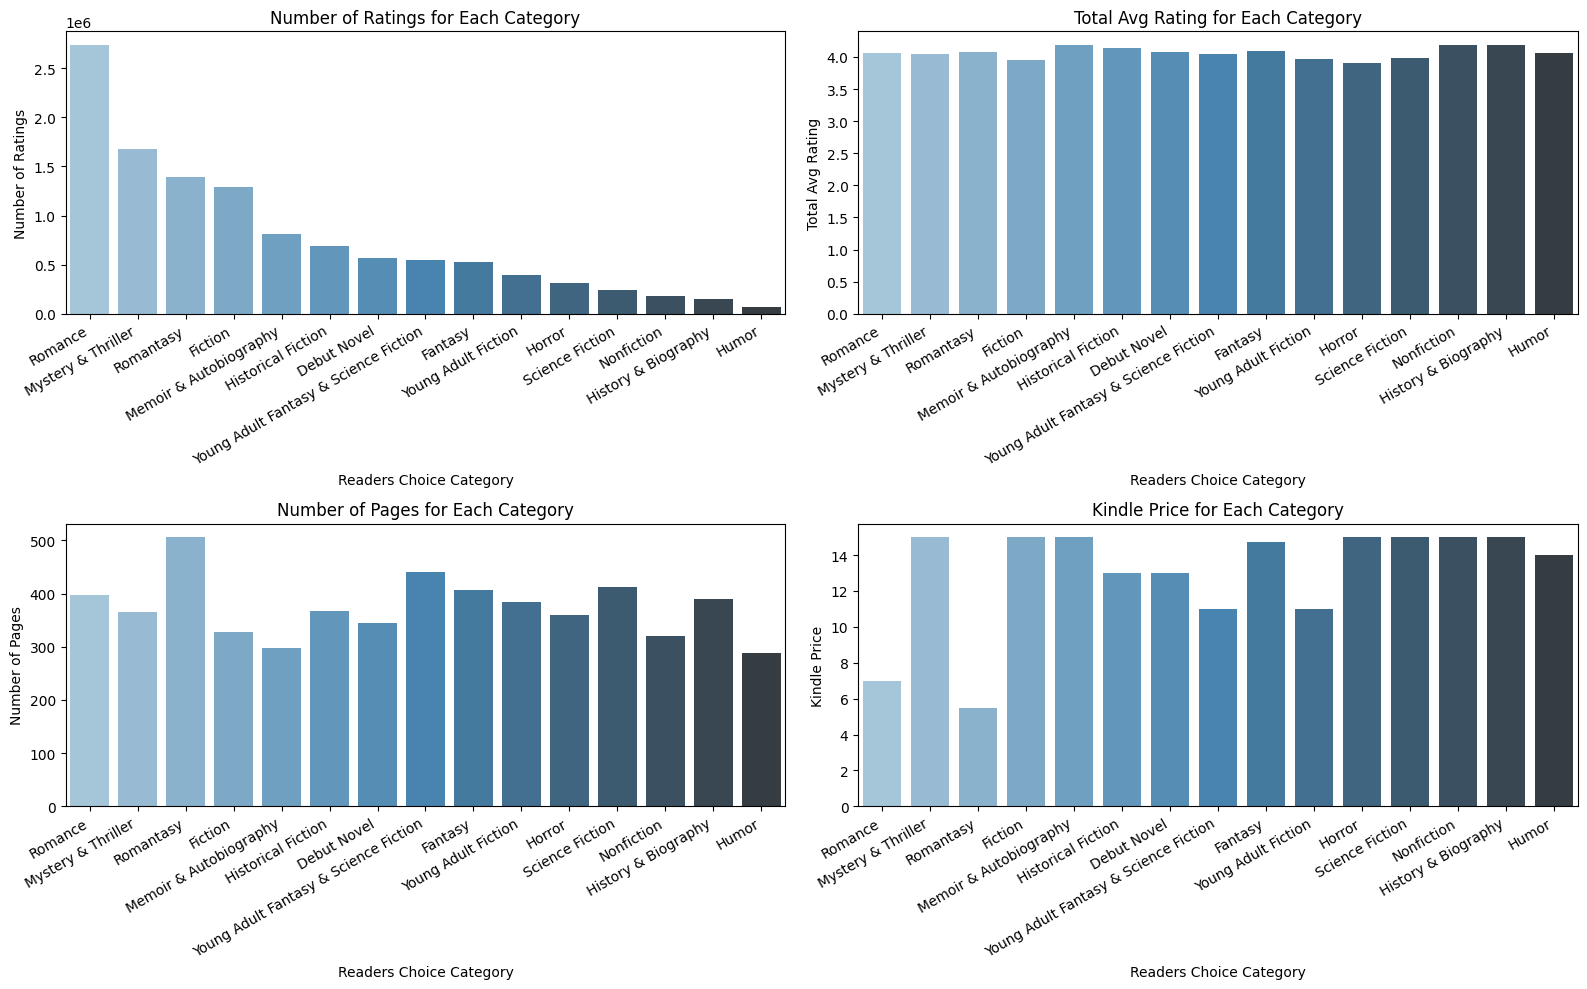

In [108]:
# figsize is (width, height) in inches
fig, axes = plt.subplots(2, 2, figsize=(16, 10), sharey=False)

layout = {
    'Number of Ratings': (0, 0),
    'Total Avg Rating': (0, 1),
    'Number of Pages': (1, 0),
    'Kindle Price': (1, 1),
}

# for column, (i, j) in layout.items():
#     ax = axes[i, j]
#     result_pd_df_sorted = result_pd_df.sort_values(by=column, ascending=False)
#     sns.barplot(x=result_pd_df_sorted.index, y=result_pd_df_sorted[column], palette='Blues_d', order=result_pd_df_sorted.index, ax=ax)
#     ax.set_title(f'{column} for Each Category')
#     ax.set_ylabel(column)
#     ax.set_xticklabels(labels=result_pd_df_sorted.index, rotation=30, ha='right')

sort_col = 'Number of Ratings'
result_df_sorted = result_df.sort(by=sort_col, descending=True) 

# polars uses descending instead of ascending, which is more in line with Python conventions
# polars also uses sort instead of sort_values, also more in line with Python conventions

for column, (i, j) in layout.items():
    ax = axes[i, j]
    # result_df_sorted = result_df.sort(by=column, descending=True)
    # result_df_sorted = result_df
    sns.barplot(x='Readers Choice Category', y=column, data=result_df_sorted, palette='Blues_d', ax=ax)
    ax.set_title(f'{column} for Each Category')
    ax.set_xticklabels(labels=result_df_sorted['Readers Choice Category'], rotation=30, ha='right')

plt.tight_layout()
plt.show()

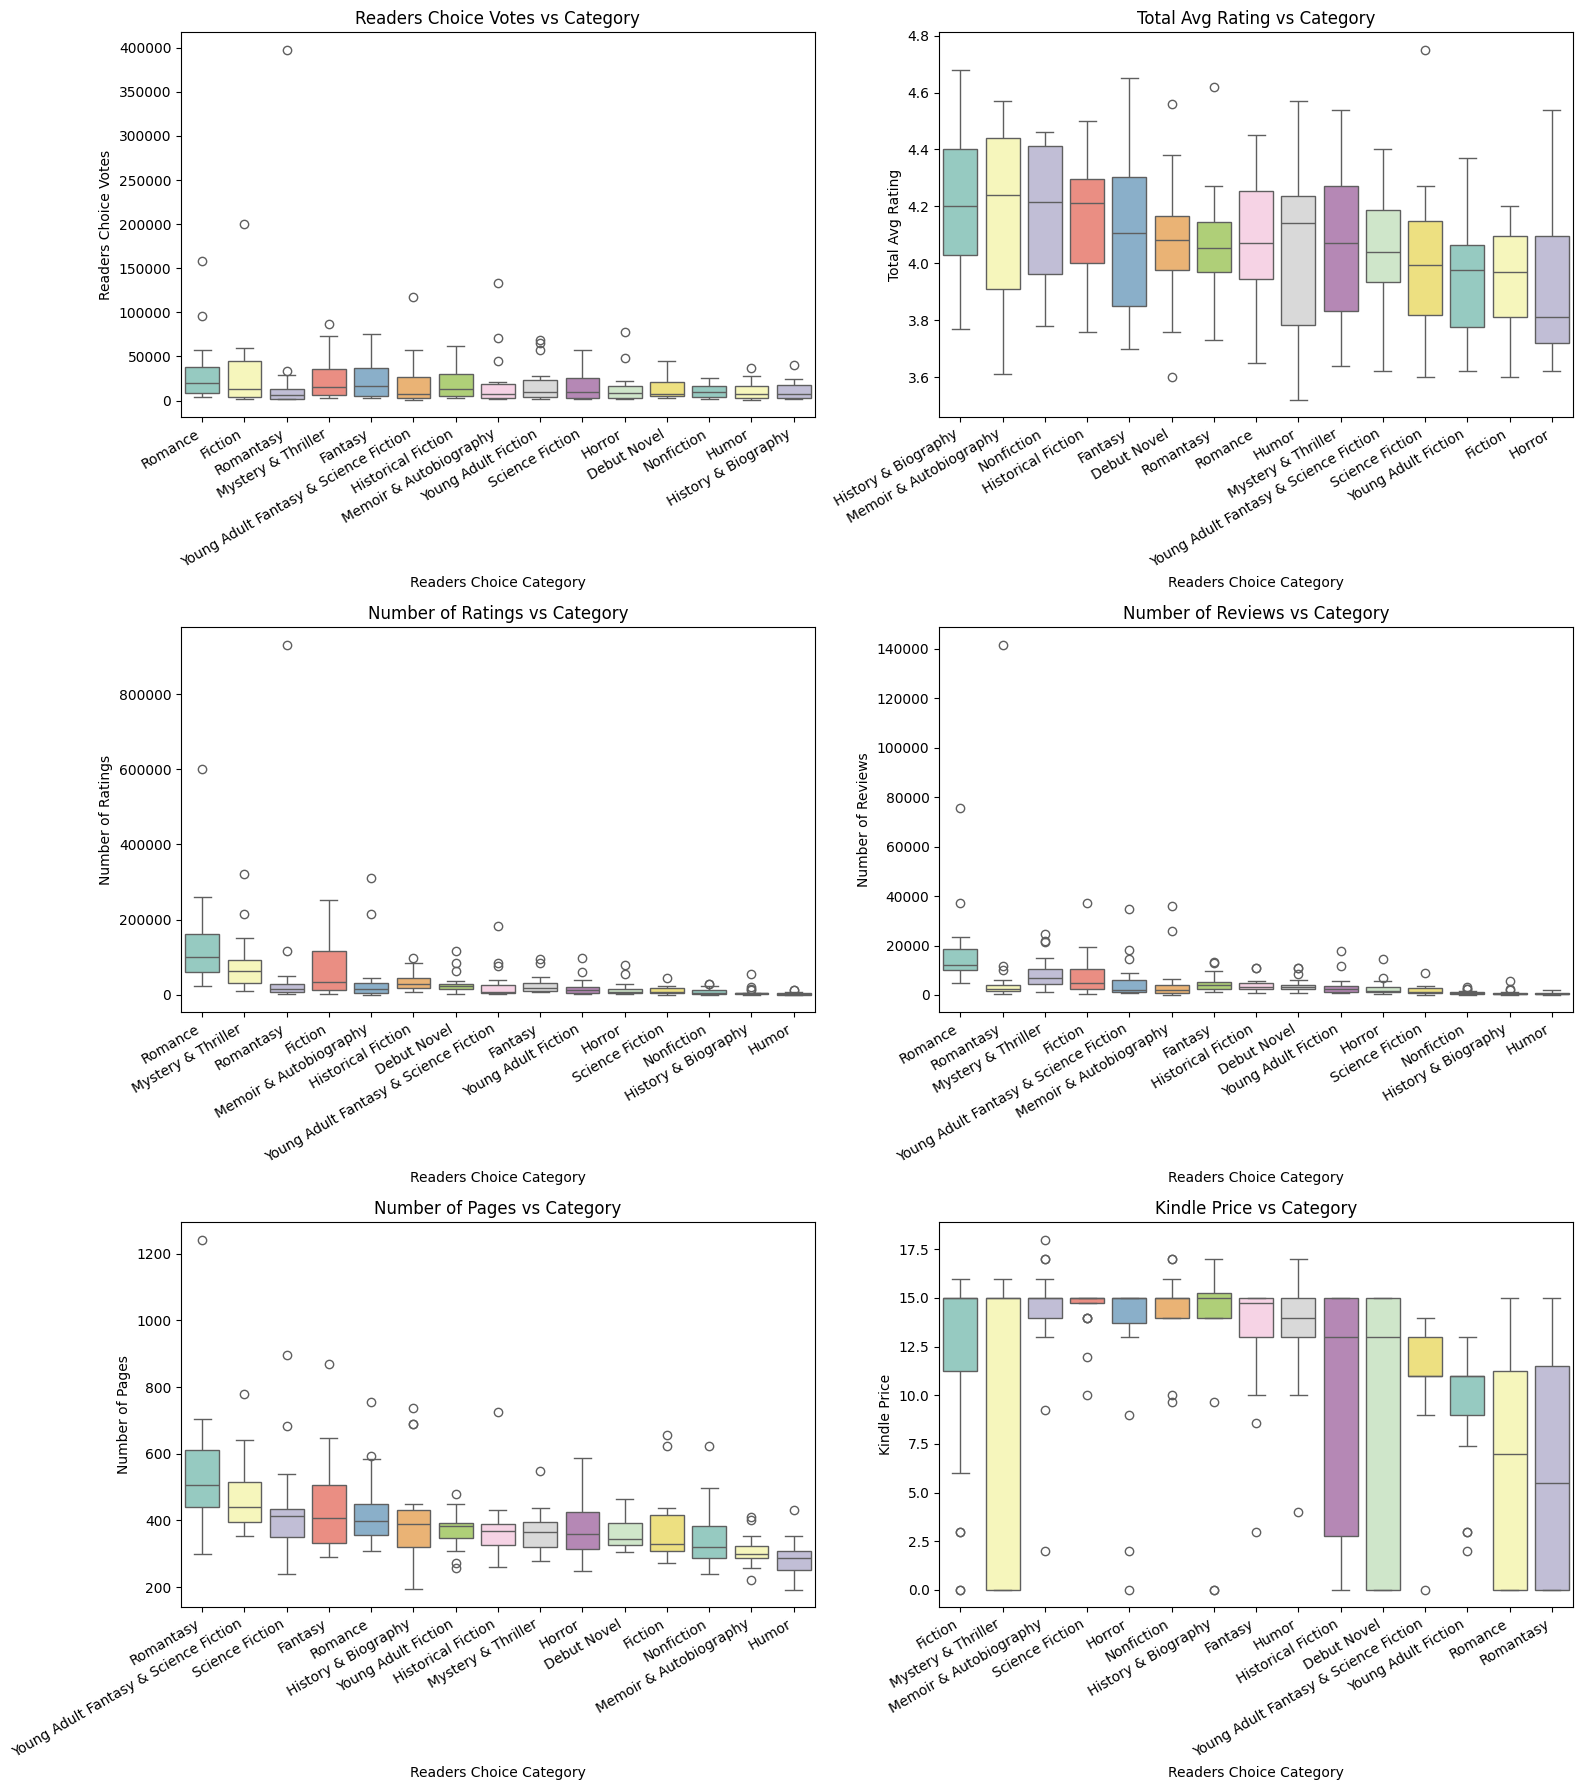

In [109]:
fig, axes = plt.subplots(3, 2, figsize=(16, 18))

layout = {
    'Readers Choice Votes': (0, 0),
    'Total Avg Rating': (0, 1),
    'Number of Ratings': (1, 0),
    'Number of Reviews': (1, 1),
    'Number of Pages': (2, 0),
    'Kindle Price': (2, 1),
}

for column, (i, j) in layout.items():
    ax = axes[i, j]
#     cols = category_vote.sort_values(by=column, ascending=False).index
    cols = result_df.sort(by=column, descending=True)['Readers Choice Category'] # order by corresponding aggregated column
    sns.boxplot(data=df, x='Readers Choice Category', y=column, palette='Set3', ax=ax, order=cols)
    ax.set_title(f'{column} vs Category')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')
    
fig.tight_layout()
plt.show()

In [110]:
df.sort('Number of Ratings')
# df['Readers Choice Category']

Readers Choice Votes,Readers Choice Category,Title,Author,Total Avg Rating,Number of Ratings,Number of Reviews,Number of Pages,Edition,First Published date,Kindle Version and Price,Kindle Price,Kindle Version
i64,str,str,str,f64,i32,i32,i64,str,str,str,f64,cat
3247,"""History & Biography""","""Star Crossed: A True Romeo and…","""Heather Dune Macadam|Simon Wor…",4.07,228,97,320,"""Hardcover""","""22-Aug-23""","""Kindle Unlimited $0.00""",0.0,"""Kindle Unlimited"""
2851,"""Nonfiction""","""Punished for Dreaming: How Sch…","""Bettina L. Love""",4.44,376,99,352,"""Hardcover""","""12-Sep-23""","""Kindle $14.99""",14.99,"""Kindle"""
1388,"""Science Fiction""","""The Jinn-Bot of Shantiport""","""Samit Basu""",3.7,450,181,404,"""Hardcover""","""3-Oct-23""","""Kindle $14.99""",14.99,"""Kindle"""
2257,"""Humor""","""Unreliable Narrator: Me, Mysel…","""Aparna Nancherla""",3.71,517,71,304,"""Hardcover""","""19-Sep-23""","""Kindle $14.99""",14.99,"""Kindle"""
3340,"""Memoir & Autobiography""","""The Witching Year: A Memoir of…","""Diana Helmuth""",3.81,551,140,352,"""Hardcover""","""3-Oct-23""","""Kindle $14.99""",14.99,"""Kindle"""
…,…,…,…,…,…,…,…,…,…,…,…,…
46423,"""Romance""","""Things We Hide from the Light""","""Lucy Score""",4.09,260774,19060,594,"""Kindle Edition""","""21-Feb-23""","""Kindle Unlimited $0.00""",0.0,"""Kindle Unlimited"""
71461,"""Memoir & Autobiography""","""Spare""","""Prince Harry|J.R. Moehringer""",3.88,310213,35794,410,"""Hardcover""","""10-Jan-23""","""Kindle $17.99""",17.99,"""Kindle"""
86468,"""Mystery & Thriller""","""The Housemaid's Secret""","""Freida McFadden""",4.28,321845,21398,318,"""Kindle Edition""","""20-Feb-23""","""Kindle Unlimited $0.00""",0.0,"""Kindle Unlimited"""


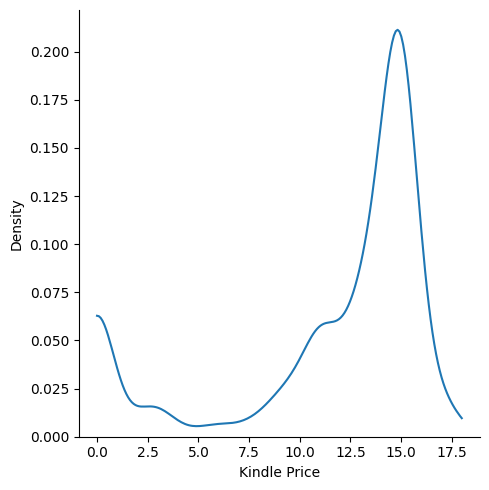

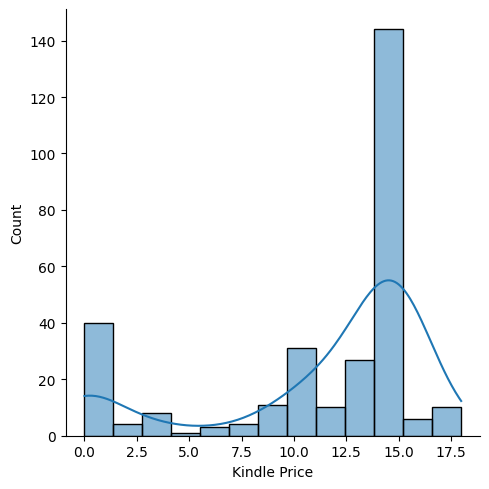

In [111]:
# bw adjust adjusts the bandwidth of the kernel.
# When you set a smaller bw_adjust, you get more contouring, but more noise
# only use small values if you think your distribution is complex
# the "cut" parameter determines how much the curve should extend beyond extreme datapoints
# we set a "0" to not show negative values in the KDE curve
sns.displot(data=df, x='Kindle Price', palette='Set3', kind='kde', bw_adjust=0.5, cut=0)

# for a pure histogram plot
# sns.displot(data=df, x='Kindle Price', palette='Set3')
sns.displot(data=df, x='Kindle Price', palette='Set3', kde=True)

plt.show()

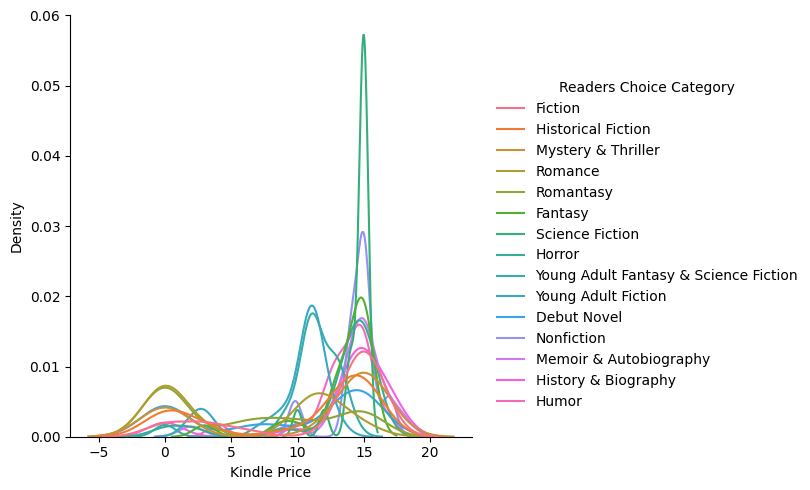

In [112]:
sns.displot(data=df, x='Kindle Price', kind='kde', hue='Readers Choice Category', bw_adjust=0.5)
plt.show()

In [113]:
# print('$0 rows', df[df['Kindle Price'] == 0].shape)
# df[df['Kindle Price'] == 0].head()

free_df = df.filter(pl.col('Kindle Price') == 0)
print(free_df.shape)
free_df.head()

(40, 13)


Readers Choice Votes,Readers Choice Category,Title,Author,Total Avg Rating,Number of Ratings,Number of Reviews,Number of Pages,Edition,First Published date,Kindle Version and Price,Kindle Price,Kindle Version
i64,str,str,str,f64,i32,i32,i64,str,str,str,f64,cat
21854,"""Fiction""","""Maame""","""Jessica George""",4.08,62960,8664,320,"""Hardcover""","""31-Jan-23""","""Kindle Unlimited $0.00""",0.0,"""Kindle Unlimited"""
18050,"""Fiction""","""The Collected Regrets of Clove…","""Mikki Brammer""",4.18,37341,5989,320,"""Hardcover""","""9-May-23""","""Kindle Unlimited $0.00""",0.0,"""Kindle Unlimited"""
62211,"""Historical Fiction""","""Weyward""","""Emilia Hart""",4.12,83461,11008,329,"""Hardcover""","""2-Feb-23""","""Kindle Unlimited $0.00""",0.0,"""Kindle Unlimited"""
29977,"""Historical Fiction""","""The Echo of Old Books""","""Barbara Davis""",4.34,45487,3439,431,"""Kindle Edition""","""28-Mar-23""","""Kindle Unlimited $0.00""",0.0,"""Kindle Unlimited"""
24150,"""Historical Fiction""","""Did You Hear About Kitty Karr?""","""Crystal Smith Paul""",3.76,30281,3268,416,"""Hardcover""","""2-May-23""","""Kindle Unlimited $0.00""",0.0,"""Kindle Unlimited"""


In [114]:
result_df

Readers Choice Category,Readers Choice Votes,Total Avg Rating,Number of Ratings,Number of Reviews,Number of Pages,Kindle Price
str,i64,f64,i32,i32,f64,f64
"""Romance""",645601,4.06,2737676,336747,398.0,6.99
"""Fiction""",587718,3.95,1288841,157445,328.0,14.99
"""Romantasy""",572812,4.07,1387830,203928,506.0,5.49
"""Mystery & Thriller""",519745,4.05,1673792,181312,365.5,14.99
"""Fantasy""",456020,4.1,523942,93625,407.5,14.73
…,…,…,…,…,…,…
"""Horror""",295053,3.91,316925,59709,360.0,14.99
"""Debut Novel""",285135,4.08,566320,77107,344.0,12.99
"""Nonfiction""",224029,4.18,185864,21393,320.0,14.99


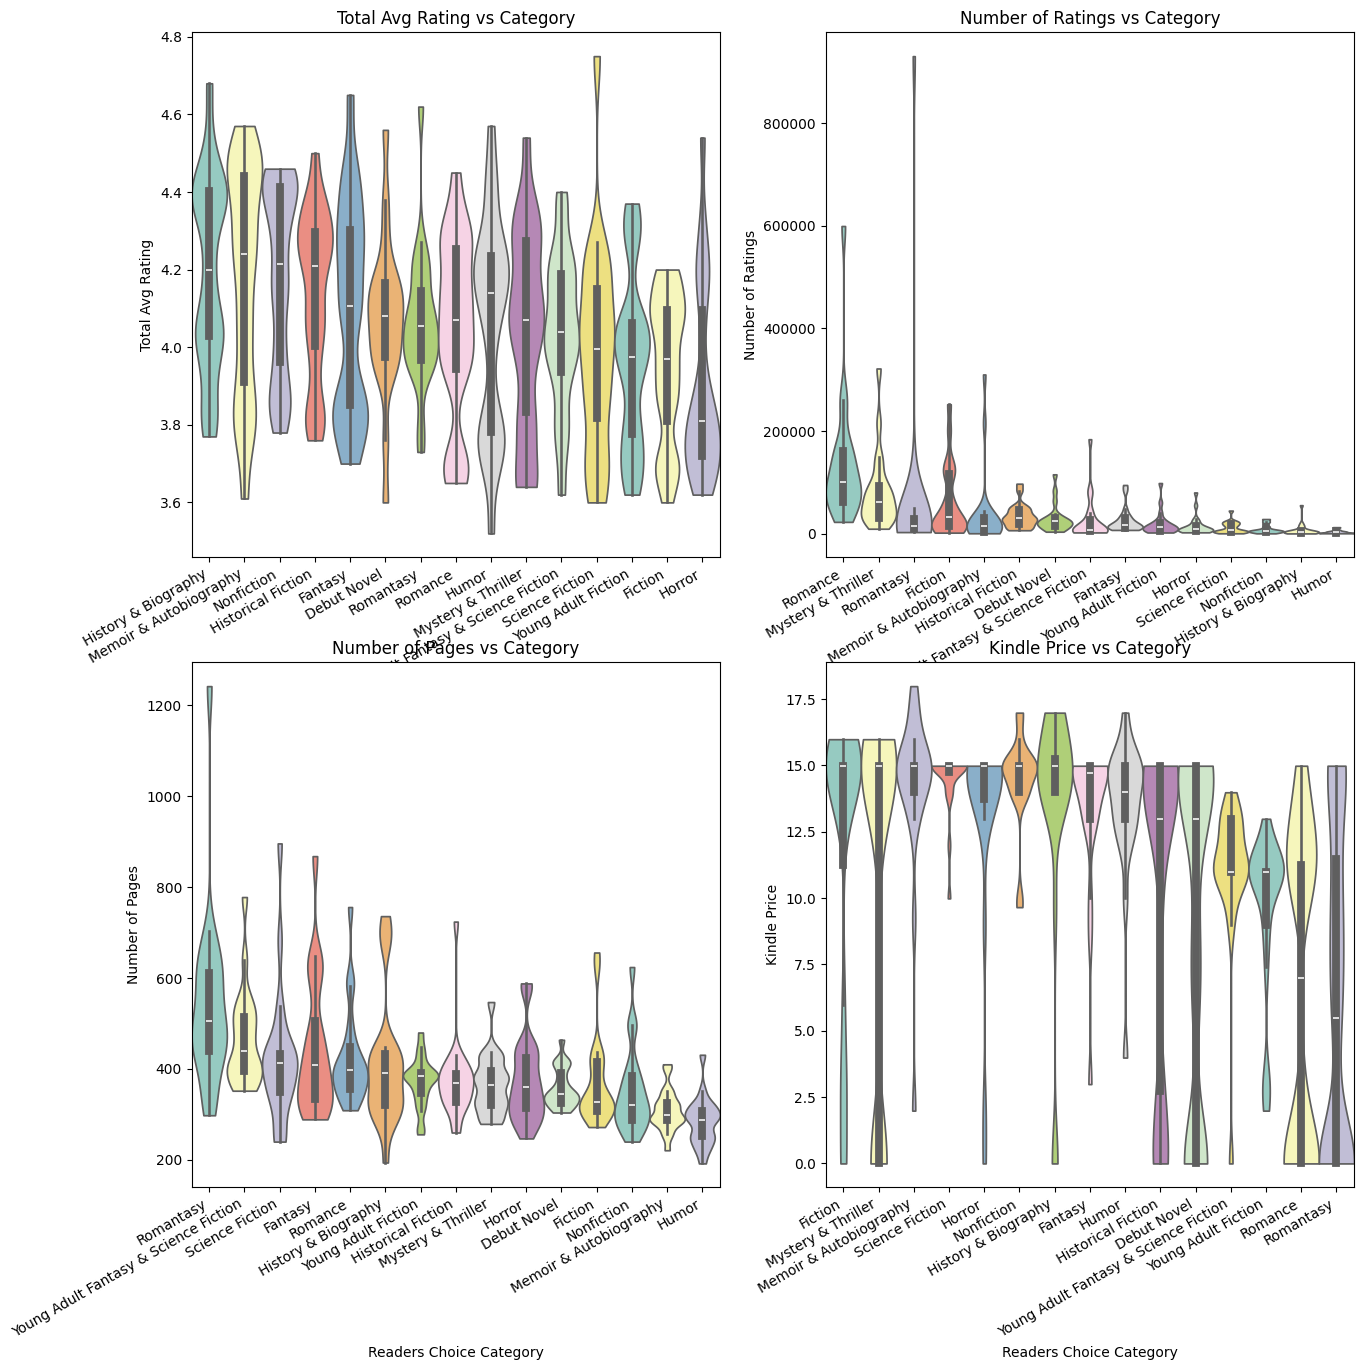

In [115]:
fig, axes = plt.subplots(2, 2, figsize=(15, 15))

layout = {
    'Total Avg Rating': (0, 0),
    'Number of Ratings': (0, 1),
    'Number of Pages': (1, 0),
    'Kindle Price': (1, 1),
}

for column, (i, j) in layout.items():
    ax = axes[i, j]
    # cols = category_vote.sort_values(by=column, ascending=False).index
    cols = result_df.sort(by=column, descending=True)['Readers Choice Category']
    sns.violinplot(data=df, x='Readers Choice Category', y=column, width=1, ax=ax, palette='Set3', bw_adjust=0.5, cut=0, order=cols)
    ax.set_title(f'{column} vs Category')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')

plt.show()

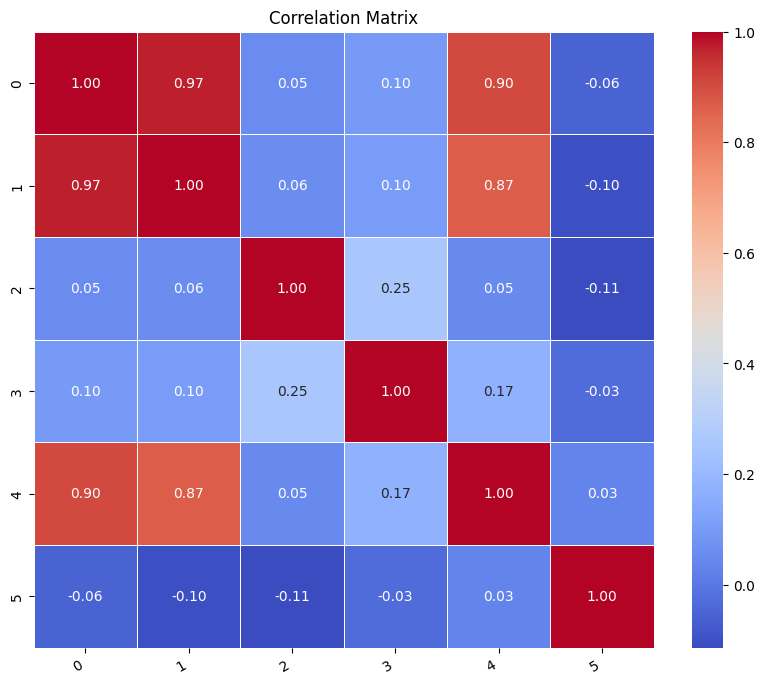

In [116]:
# Assign the columns
columns_of_interest = ['Number of Reviews', 'Number of Ratings', 'Number of Pages', 'Total Avg Rating', 'Readers Choice Votes', 'Kindle Price']

# Calculate the correlation matrix
correlation_matrix = df[columns_of_interest].corr()

# Display the correlation matrix
plt.figure(figsize=(10, 8))

# BrBG is another cool heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.xticks(rotation=30, ha='right')
plt.show()

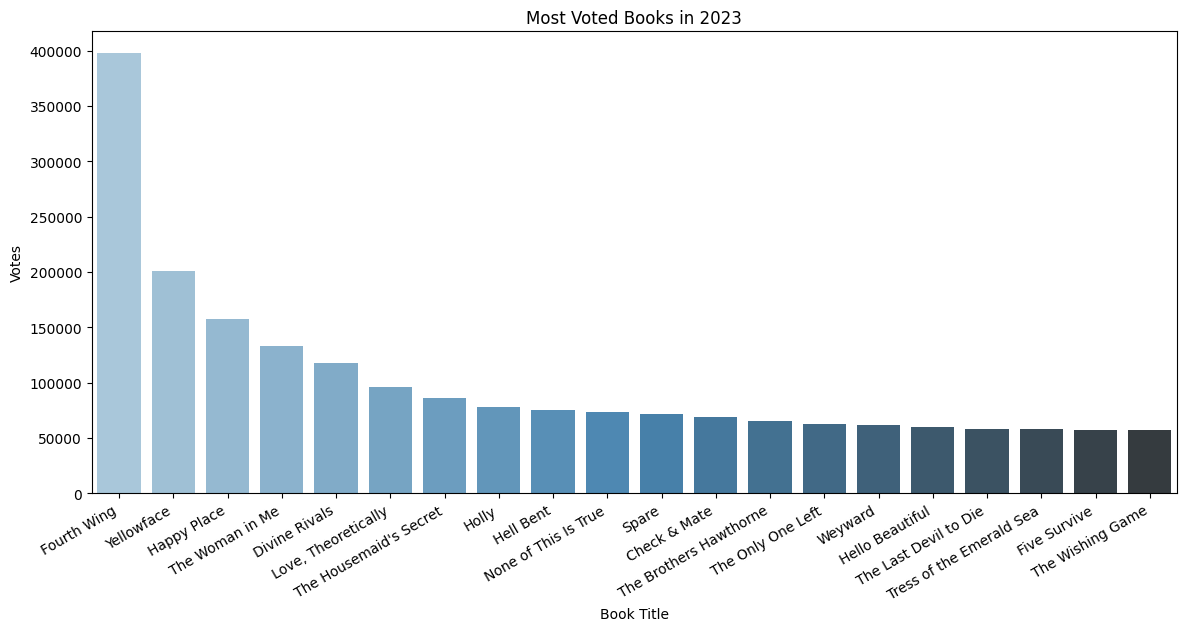

In [117]:
# most_voted_books = df.sort_values(by='Readers Choice Votes', ascending=False).head(20)
most_voted_books = df.sort(by='Readers Choice Votes', descending=True).head(20)

plt.figure(figsize=(14, 6))
sns.barplot(most_voted_books, x='Title', y='Readers Choice Votes', palette='Blues_d')
plt.title('Most Voted Books in 2023')
plt.xlabel('Book Title')
plt.ylabel('Votes')
plt.xticks(rotation=30, ha='right')
plt.show()

In [118]:
# max_votes_index = df.groupby('Readers Choice Category')['Readers Choice Votes'].idxmax()
# max_votes_index = df.group_by('Readers Choice Category')['Readers Choice Votes'].idxmax()
# titles_with_max_votes = df.loc[max_votes_index, ['Readers Choice Category', 'Title', 'Readers Choice Votes']].sort_values('Readers Choice Votes', ascending=False)
# titles_with_max_votes

 # being able to sort within a group is a powerful feature
max_votes_df = df.group_by('Readers Choice Category')\
    .agg(pl.all().sort_by('Readers Choice Votes', descending=True).first())\
    .select(['Readers Choice Category', 'Title', 'Readers Choice Votes'])\
    .sort('Readers Choice Votes', descending=True)
max_votes_df
df

Readers Choice Votes,Readers Choice Category,Title,Author,Total Avg Rating,Number of Ratings,Number of Reviews,Number of Pages,Edition,First Published date,Kindle Version and Price,Kindle Price,Kindle Version
i64,str,str,str,f64,i32,i32,i64,str,str,str,f64,cat
200722,"""Fiction""","""Yellowface""","""R.F. Kuang""",3.87,252189,37032,336,"""Hardcover""","""25-May-23""","""Kindle $14.99""",14.99,"""Kindle"""
60171,"""Fiction""","""Hello Beautiful""","""Ann Napolitano""",4.2,200304,19288,416,"""Kindle Edition""","""14-Mar-23""","""Kindle $2.99""",2.99,"""Kindle"""
57702,"""Fiction""","""The Wishing Game""","""Meg Shaffer""",4.19,62142,10594,304,"""Hardcover""","""30-May-23""","""Kindle $2.99""",2.99,"""Kindle"""
53470,"""Fiction""","""Tom Lake""","""Ann Patchett""",4.13,127318,16108,309,"""Hardcover""","""1-Aug-23""","""Kindle $15.99""",15.99,"""Kindle"""
45859,"""Fiction""","""The Five-Star Weekend""","""Elin Hilderbrand""",4.11,116619,8141,384,"""Hardcover""","""13-Jun-23""","""Kindle $14.99""",14.99,"""Kindle"""
…,…,…,…,…,…,…,…,…,…,…,…,…
2533,"""Humor""","""Misfit: Growing Up Awkward in …","""Gary Gulman""",4.23,981,155,304,"""Hardcover""","""19-Sep-23""","""Kindle $14.99""",14.99,"""Kindle"""
2257,"""Humor""","""Unreliable Narrator: Me, Mysel…","""Aparna Nancherla""",3.71,517,71,304,"""Hardcover""","""19-Sep-23""","""Kindle $14.99""",14.99,"""Kindle"""
1866,"""Humor""","""America the Beautiful?: One Wo…","""Blythe Roberson""",3.83,1200,247,304,"""Paperback""","""18-Apr-23""","""Kindle $9.99""",9.99,"""Kindle"""


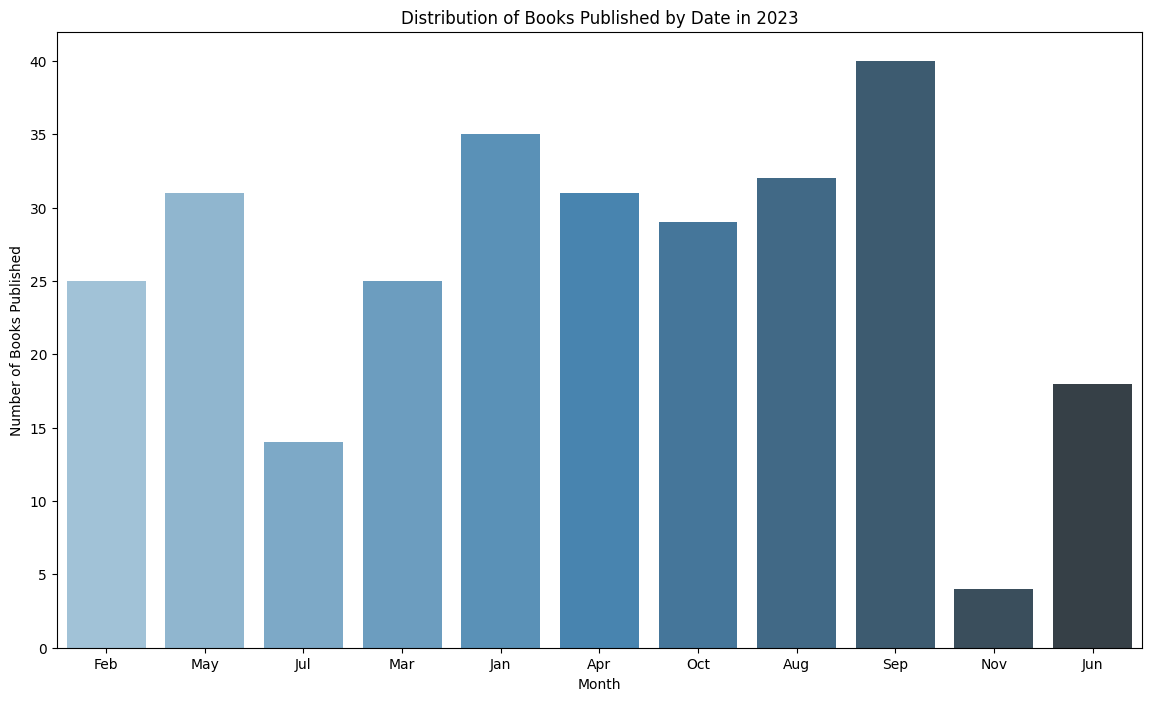

In [137]:
import calendar
# pd_df['First Published date'] = pd.to_datetime(pd_df['First Published date'])
# books_2023 = pd_df[pd_df['First Published date'].dt.year == 2023]
# books_per_month = books_2023.groupby(books_2023['First Published date'].dt.month)['Title'].count().reset_index()
# books_per_month['Month'] = books_per_month['First Published date'].apply(lambda x: calendar.month_abbr[x])
# books_per_month

books_2023 = df.with_columns(pl.col('First Published date').str.to_datetime('%d-%b-%y'))\
    .filter(pl.col('First Published date').dt.year() == 2023)
books_per_month = books_2023.with_columns(pl.col('First Published date').dt.month().alias('Month'))\
    .group_by('Month')\
    .agg(pl.col('Title').count())\
    .with_columns(
        pl.col('Month').map_elements(lambda x: calendar.month_abbr[x])
    )

plt.figure(figsize=(14, 8))
sns.barplot(data=books_per_month, x='Month', y='Title', palette='Blues_d')
plt.title('Distribution of Books Published by Date in 2023')
plt.xlabel('Month')
plt.ylabel('Number of Books Published')
plt.show()

In [140]:
data = [
    {'Date': '2024-08-10', 'Open': 148.0, 'High': 150.0, 'Low': 146.5, 'Close': 149.5, 'Volume': 1200000},
    {'Date': '2024-08-11', 'Open': 149.5, 'High': 151.5, 'Low': 147.0, 'Close': 150.5, 'Volume': 1300000},
    {'Date': '2024-08-12', 'Open': 150.0, 'High': 152.0, 'Low': 148.5, 'Close': 151.5, 'Volume': 1250000},
    {'Date': '2024-08-13', 'Open': 151.5, 'High': 153.0, 'Low': 149.0, 'Close': 152.0, 'Volume': 1400000},
    {'Date': '2024-08-14', 'Open': 150.0, 'High': 152.0, 'Low': 148.5, 'Close': 151.5, 'Volume': 1000000},
    {'Date': '2024-08-15', 'Open': 152.5, 'High': 154.0, 'Low': 150.0, 'Close': 153.0, 'Volume': 1500000},
    {'Date': '2024-08-16', 'Open': 151.0, 'High': 153.0, 'Low': 149.0, 'Close': 150.5, 'Volume': 1200000},
    {'Date': '2024-08-17', 'Open': 153.5, 'High': 156.0, 'Low': 151.5, 'Close': 155.5, 'Volume': 1300000},
    {'Date': '2024-08-18', 'Open': 155.0, 'High': 157.5, 'Low': 153.0, 'Close': 156.0, 'Volume': 1100000},
    {'Date': '2024-08-19', 'Open': 156.5, 'High': 158.0, 'Low': 154.0, 'Close': 157.0, 'Volume': 1150000}
]
data

[{'Date': '2024-08-10',
  'Open': 148.0,
  'High': 150.0,
  'Low': 146.5,
  'Close': 149.5,
  'Volume': 1200000},
 {'Date': '2024-08-11',
  'Open': 149.5,
  'High': 151.5,
  'Low': 147.0,
  'Close': 150.5,
  'Volume': 1300000},
 {'Date': '2024-08-12',
  'Open': 150.0,
  'High': 152.0,
  'Low': 148.5,
  'Close': 151.5,
  'Volume': 1250000},
 {'Date': '2024-08-13',
  'Open': 151.5,
  'High': 153.0,
  'Low': 149.0,
  'Close': 152.0,
  'Volume': 1400000},
 {'Date': '2024-08-14',
  'Open': 150.0,
  'High': 152.0,
  'Low': 148.5,
  'Close': 151.5,
  'Volume': 1000000},
 {'Date': '2024-08-15',
  'Open': 152.5,
  'High': 154.0,
  'Low': 150.0,
  'Close': 153.0,
  'Volume': 1500000},
 {'Date': '2024-08-16',
  'Open': 151.0,
  'High': 153.0,
  'Low': 149.0,
  'Close': 150.5,
  'Volume': 1200000},
 {'Date': '2024-08-17',
  'Open': 153.5,
  'High': 156.0,
  'Low': 151.5,
  'Close': 155.5,
  'Volume': 1300000},
 {'Date': '2024-08-18',
  'Open': 155.0,
  'High': 157.5,
  'Low': 153.0,
  'Close': 156